In [30]:
# ============================================================================
# CLAIM SEVERITY AND FREQUENCY PREDICTION EDA
# ============================================================================

# STEP 1: Upload file
from google.colab import files
print("Click 'Choose Files' to upload your CSV...")
uploaded = files.upload()
filepath = list(uploaded.keys())[0]
print(f"Uploaded: {filepath}\n")

# STEP 2: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
print("Libraries loaded\n")

Click 'Choose Files' to upload your CSV...


Saving train.csv to train (2).csv
Uploaded: train (2).csv

Libraries loaded



In [31]:
# ============================================================================
# PHASE 1: DATA LOADING
# ============================================================================
print("="*80)
print("PHASE 1: DATA LOADING & OVERVIEW")
print("="*80)

df = pd.read_csv(filepath)
cat_cols = [col for col in df.columns if col.startswith('cat')]
cont_cols = [col for col in df.columns if col.startswith('cont')]

print(f"\nDataset Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"\nFeatures: {len(cat_cols)} categorical, {len(cont_cols)} continuous")
print(f"\nFirst 3 rows:")
print(df.head(3))

PHASE 1: DATA LOADING & OVERVIEW

Dataset Shape: 188,318 rows × 132 columns
Memory Usage: 1065.36 MB

Features: 116 categorical, 14 continuous

First 3 rows:
   id cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9  ...     cont6     cont7  \
0   1    A    B    A    B    A    A    A    A    B  ...  0.718367  0.335060   
1   2    A    B    A    A    A    A    A    A    B  ...  0.438917  0.436585   
2   5    A    B    A    A    B    A    A    A    B  ...  0.289648  0.315545   

     cont8    cont9   cont10    cont11    cont12    cont13    cont14     loss  
0  0.30260  0.67135  0.83510  0.569745  0.594646  0.822493  0.714843  2213.18  
1  0.60087  0.35127  0.43919  0.338312  0.366307  0.611431  0.304496  1283.60  
2  0.27320  0.26076  0.32446  0.381398  0.373424  0.195709  0.774425  3005.09  

[3 rows x 132 columns]


In [32]:
# ============================================================================
# PHASE 2: DATA QUALITY
# ============================================================================
print("\n" + "="*80)
print("PHASE 2: DATA QUALITY")
print("="*80)

missing = df.isnull().sum().sum()
print(f"\nMissing values: {missing}")

dup_count = df.duplicated().sum()
dup_id = df['id'].duplicated().sum()
print(f"Duplicate rows: {dup_count}, Duplicate IDs: {dup_id}")


PHASE 2: DATA QUALITY

Missing values: 0
Duplicate rows: 0, Duplicate IDs: 0



PHASE 3: TARGET VARIABLE (LOSS)

Summary Statistics:
   Mean: $3,037.34
   Median: $2,115.57
   Std: $2,904.09
   Min: $0.67
   Max: $121,012.25
   Skewness: 3.7950
   Zero losses: 0 (0.00%)


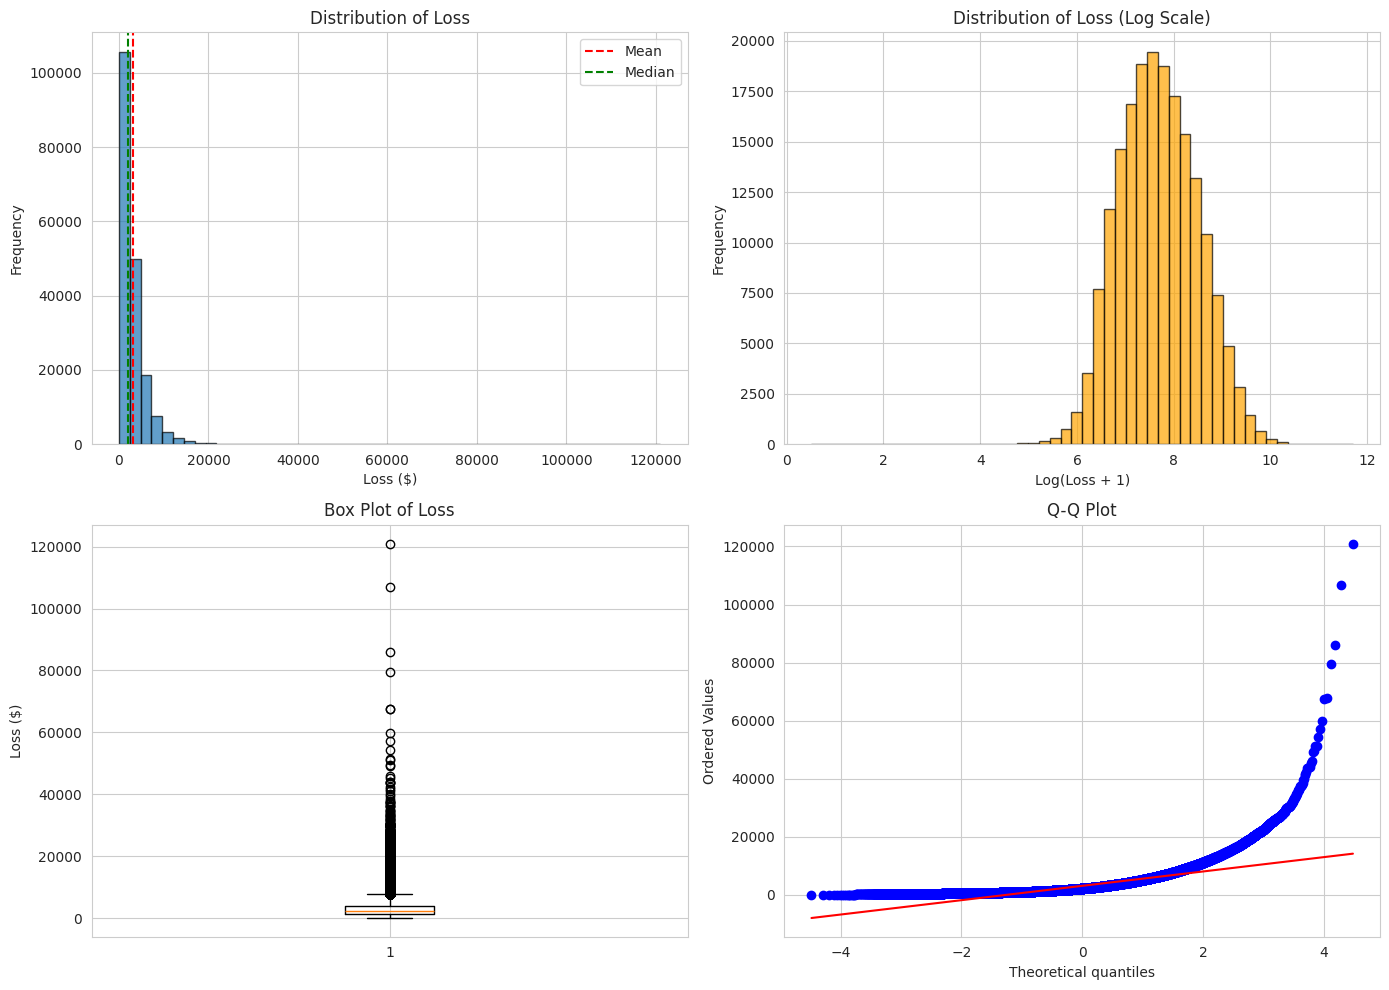

Saved: target_analysis.png


In [33]:
# ============================================================================
# PHASE 3: TARGET ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("PHASE 3: TARGET VARIABLE (LOSS)")
print("="*80)

loss = df['loss']
print(f"\nSummary Statistics:")
print(f"   Mean: ${loss.mean():,.2f}")
print(f"   Median: ${loss.median():,.2f}")
print(f"   Std: ${loss.std():,.2f}")
print(f"   Min: ${loss.min():,.2f}")
print(f"   Max: ${loss.max():,.2f}")
print(f"   Skewness: {loss.skew():.4f}")
print(f"   Zero losses: {(loss == 0).sum():,} ({(loss == 0).sum()/len(loss)*100:.2f}%)")

# Plot target
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].hist(loss, bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Loss ($)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Loss')
axes[0, 0].axvline(loss.mean(), color='red', linestyle='--', label=f'Mean')
axes[0, 0].axvline(loss.median(), color='green', linestyle='--', label=f'Median')
axes[0, 0].legend()

axes[0, 1].hist(np.log1p(loss), bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[0, 1].set_xlabel('Log(Loss + 1)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of Loss (Log Scale)')

axes[1, 0].boxplot(loss, vert=True)
axes[1, 0].set_ylabel('Loss ($)')
axes[1, 0].set_title('Box Plot of Loss')

stats.probplot(loss, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot')

plt.tight_layout()
plt.savefig('target_analysis.png', dpi=300, bbox_inches='tight')
plt.show()
print("Saved: target_analysis.png")


PHASE 4: CATEGORICAL FEATURES

 Cardinality Summary:
   Min: 2
   Max: 326
   Mean: 9.82
   Median: 2

 Low cardinality (≤5): 91
 Medium cardinality (6-20): 19
 High cardinality (>20): 6

 Top 10 Highest Cardinality:
        Unique_Values
cat116            326
cat110            131
cat109             84
cat113             61
cat112             51
cat115             23
cat105             20
cat107             20
cat101             19
cat114             19


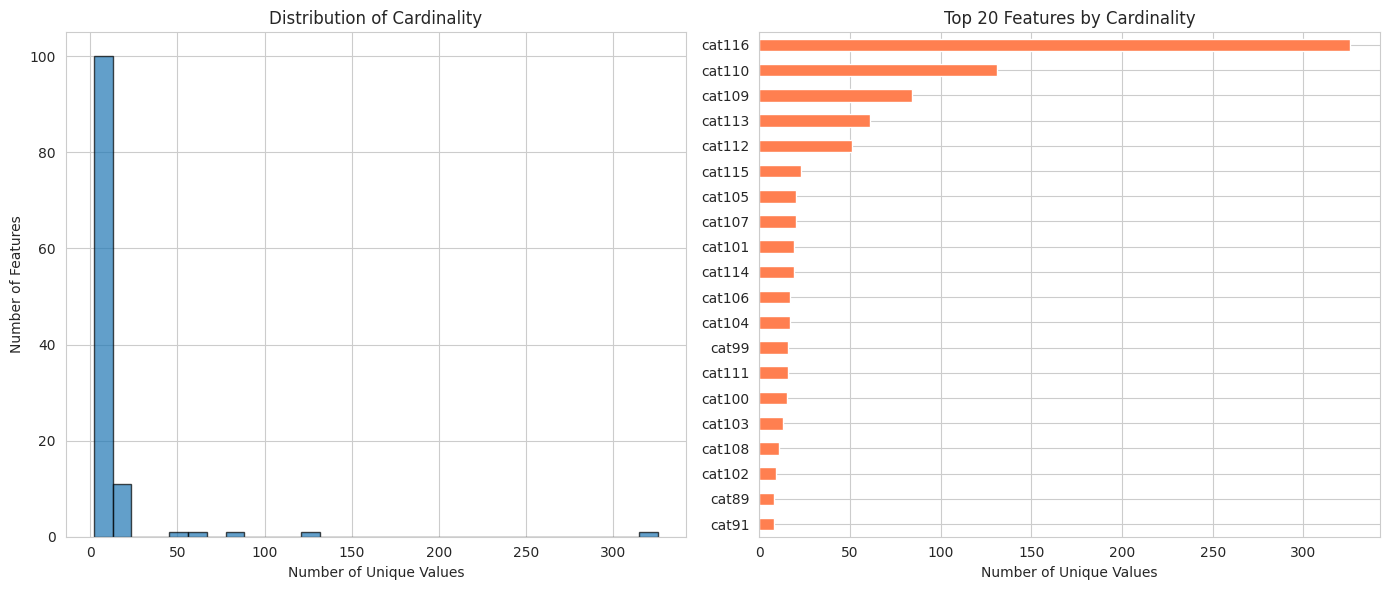

 Saved: categorical_cardinality.png


In [35]:
# ============================================================================
# PHASE 4: CATEGORICAL FEATURES
# ============================================================================
print("\n" + "="*80)
print("PHASE 4: CATEGORICAL FEATURES")
print("="*80)

cardinality = {col: df[col].nunique() for col in cat_cols}
cardinality_df = pd.DataFrame.from_dict(cardinality, orient='index', columns=['Unique_Values'])
cardinality_df = cardinality_df.sort_values('Unique_Values', ascending=False)

print(f"\n Cardinality Summary:")
print(f"   Min: {cardinality_df['Unique_Values'].min()}")
print(f"   Max: {cardinality_df['Unique_Values'].max()}")
print(f"   Mean: {cardinality_df['Unique_Values'].mean():.2f}")
print(f"   Median: {cardinality_df['Unique_Values'].median():.0f}")

low_card = cardinality_df[cardinality_df['Unique_Values'] <= 5]
med_card = cardinality_df[(cardinality_df['Unique_Values'] > 5) & (cardinality_df['Unique_Values'] <= 20)]
high_card = cardinality_df[cardinality_df['Unique_Values'] > 20]

print(f"\n Low cardinality (≤5): {len(low_card)}")
print(f" Medium cardinality (6-20): {len(med_card)}")
print(f" High cardinality (>20): {len(high_card)}")

print("\n Top 10 Highest Cardinality:")
print(cardinality_df.head(10))

# Plot cardinality
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].hist(cardinality_df['Unique_Values'], bins=30, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Number of Unique Values')
axes[0].set_ylabel('Number of Features')
axes[0].set_title('Distribution of Cardinality')

cardinality_df.head(20).plot(kind='barh', ax=axes[1], legend=False, color='coral')
axes[1].set_xlabel('Number of Unique Values')
axes[1].set_title('Top 20 Features by Cardinality')
axes[1].invert_yaxis()

plt.tight_layout()
plt.savefig('categorical_cardinality.png', dpi=300, bbox_inches='tight')
plt.show()
print(" Saved: categorical_cardinality.png")

In [37]:
# ============================================================================
# PHASE 5: CONTINUOUS FEATURES
# ============================================================================
print("\n" + "="*80)
print("PHASE 5: CONTINUOUS FEATURES")
print("="*80)

print(f"\n Summary Statistics:")
print(df[cont_cols].describe().round(4))

corr_matrix = df[cont_cols].corr()

high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

if high_corr_pairs:
    print(f"\n Found {len(high_corr_pairs)} highly correlated pairs (|r| > 0.7):")
    for feat1, feat2, corr in high_corr_pairs:
        print(f"   {feat1} ↔ {feat2}: {corr:.4f}")
else:
    print("\n No highly correlated pairs found")




PHASE 5: CONTINUOUS FEATURES

 Summary Statistics:
             cont1        cont2        cont3        cont4        cont5  \
count  188318.0000  188318.0000  188318.0000  188318.0000  188318.0000   
mean        0.4939       0.5072       0.4989       0.4918       0.4874   
std         0.1876       0.2072       0.2021       0.2113       0.2090   
min         0.0000       0.0011       0.0026       0.1769       0.2811   
25%         0.3461       0.3583       0.3370       0.3274       0.2811   
50%         0.4758       0.5558       0.5280       0.4529       0.4223   
75%         0.6239       0.6818       0.6342       0.6521       0.6433   
max         0.9850       0.8627       0.9443       0.9543       0.9837   

             cont6        cont7        cont8        cont9       cont10  \
count  188318.0000  188318.0000  188318.0000  188318.0000  188318.0000   
mean        0.4909       0.4850       0.4864       0.4855       0.4981   
std         0.2053       0.1785       0.1994       0.1817  

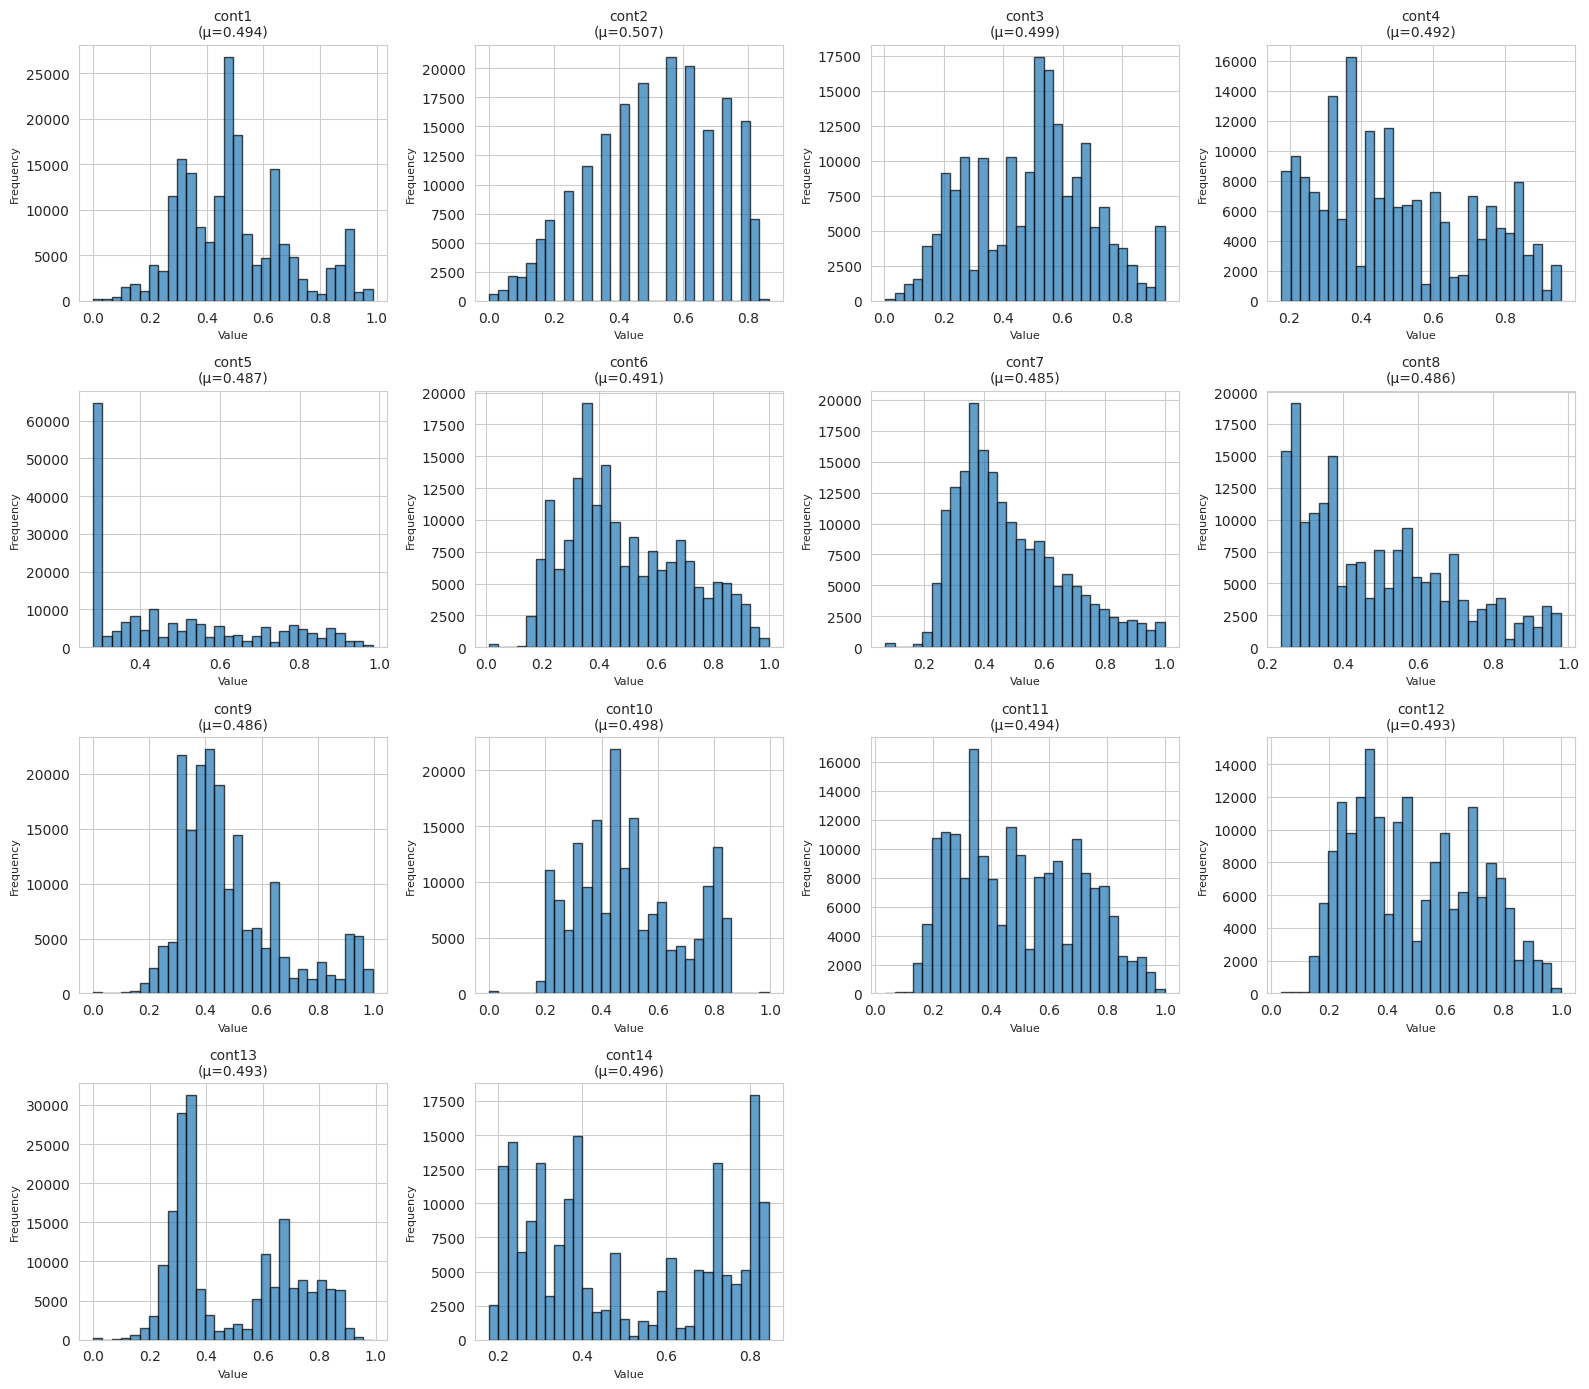

 Saved: continuous_distributions.png


In [38]:
# Plot distributions
fig, axes = plt.subplots(4, 4, figsize=(16, 14))
axes = axes.ravel()

for idx, col in enumerate(cont_cols):
    axes[idx].hist(df[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{col}\n(μ={df[col].mean():.3f})', fontsize=10)
    axes[idx].set_xlabel('Value', fontsize=8)
    axes[idx].set_ylabel('Frequency', fontsize=8)

for idx in range(len(cont_cols), 16):
    axes[idx].axis('off')

plt.tight_layout()
plt.savefig('continuous_distributions.png', dpi=300, bbox_inches='tight')
plt.show()
print(" Saved: continuous_distributions.png")

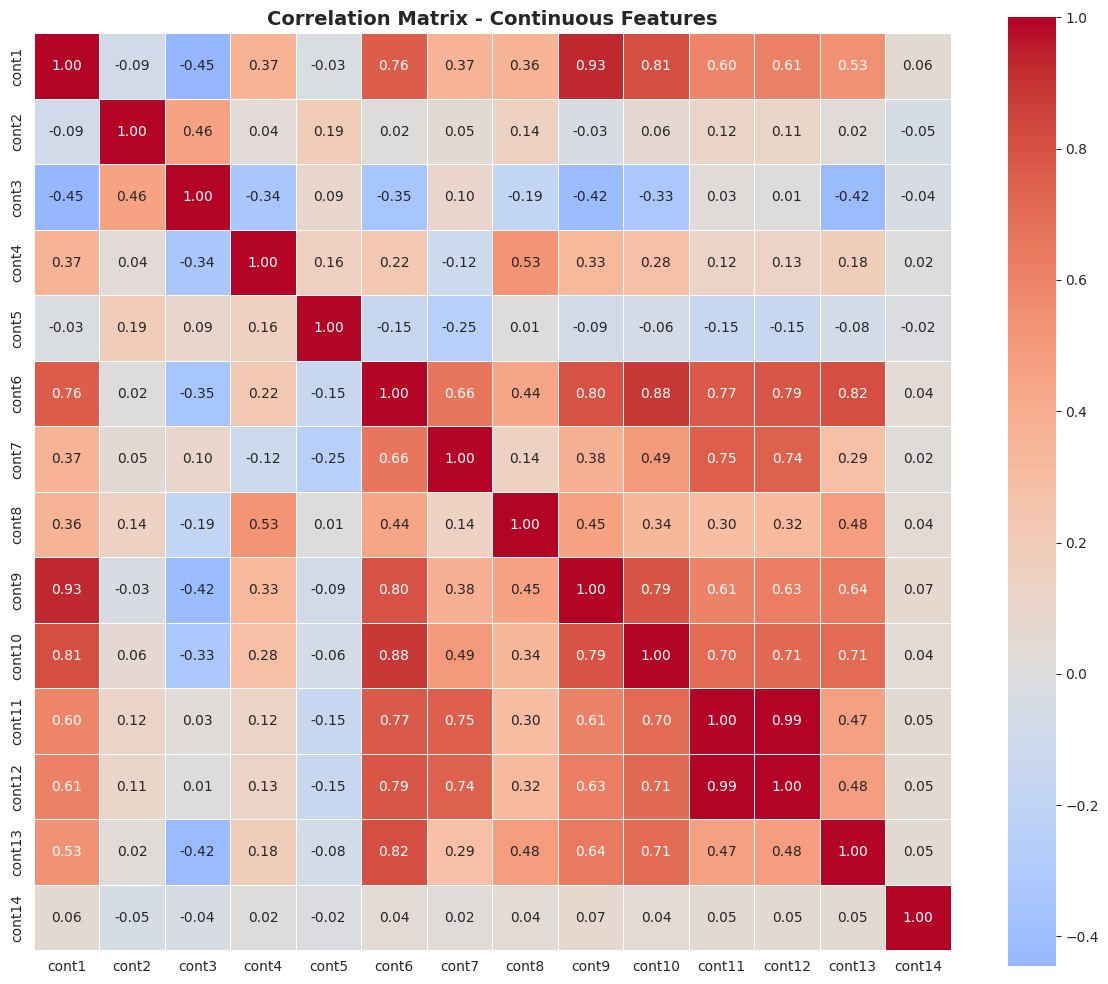

 Saved: correlation_heatmap.png


In [39]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True, linewidths=0.5)
plt.title('Correlation Matrix - Continuous Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()
print(" Saved: correlation_heatmap.png")


PHASE 6: FEATURE-TARGET RELATIONSHIPS

 Continuous Features vs Loss:
cont2     0.141528
cont7     0.119799
cont3     0.111053
cont11    0.099806
cont12    0.098724
cont6     0.040967
cont8     0.030508
cont10    0.020236
cont14    0.019298
cont9     0.014456
cont13   -0.004022
cont1    -0.010237
cont5    -0.011355
cont4    -0.035831
Name: loss, dtype: float64


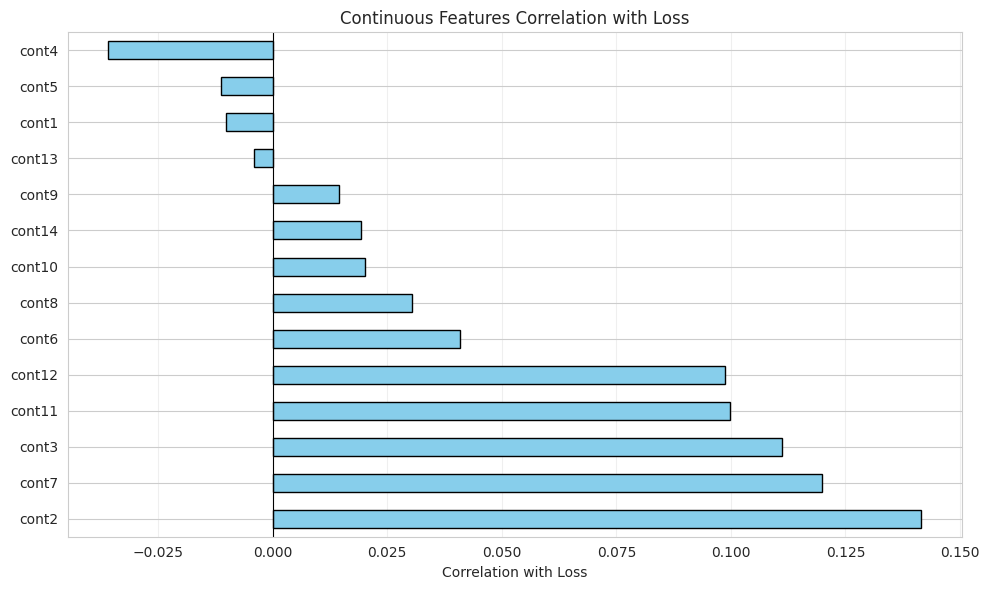

 Saved: feature_target_correlation.png


In [41]:
# ============================================================================
# PHASE 6: FEATURE-TARGET RELATIONSHIPS
# ============================================================================
print("\n" + "="*80)
print("PHASE 6: FEATURE-TARGET RELATIONSHIPS")
print("="*80)

cont_target_corr = df[cont_cols + ['loss']].corr()['loss'].drop('loss').sort_values(ascending=False)
print("\n Continuous Features vs Loss:")
print(cont_target_corr)

# Plot correlation
plt.figure(figsize=(10, 6))
cont_target_corr.plot(kind='barh', color='skyblue', edgecolor='black')
plt.xlabel('Correlation with Loss')
plt.title('Continuous Features Correlation with Loss')
plt.axvline(0, color='black', linewidth=0.8)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('feature_target_correlation.png', dpi=300, bbox_inches='tight')
plt.show()
print(" Saved: feature_target_correlation.png")



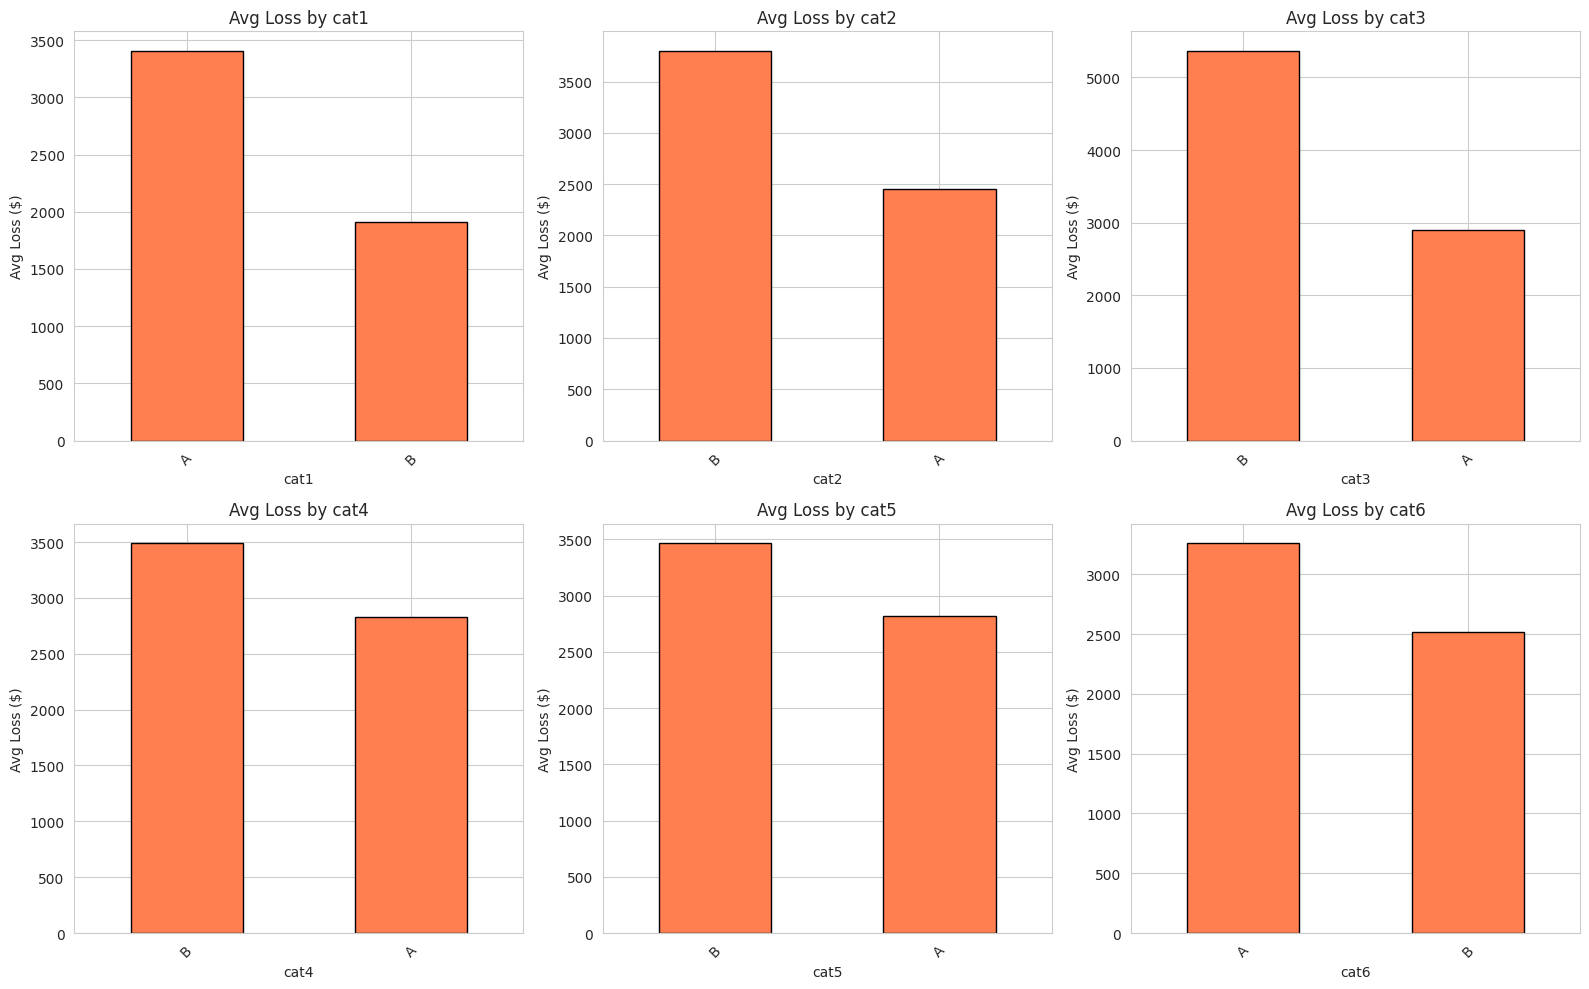

 Saved: categorical_target_relationship.png


In [42]:
# Categorical vs target
low_card_features = [col for col in cat_cols if df[col].nunique() <= 10][:6]

if len(low_card_features) > 0:
    fig, axes = plt.subplots(2, 3, figsize=(16, 10))
    axes = axes.ravel()

    for idx, col in enumerate(low_card_features):
        avg_loss = df.groupby(col)['loss'].mean().sort_values(ascending=False)
        avg_loss.plot(kind='bar', ax=axes[idx], color='coral', edgecolor='black')
        axes[idx].set_title(f'Avg Loss by {col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Avg Loss ($)')
        axes[idx].tick_params(axis='x', rotation=45)

    for idx in range(len(low_card_features), 6):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.savefig('categorical_target_relationship.png', dpi=300, bbox_inches='tight')
    plt.show()
    print(" Saved: categorical_target_relationship.png")


In [43]:
# ============================================================================
# FINAL SUMMARY
# ============================================================================
print("\n" + "="*80)
print("✅ EDA COMPLETE!")
print("="*80)
print("\n📁 Generated 6 PNG files (check left sidebar)")
print(f"\n📊 Dataset: {len(df):,} rows, {len(cat_cols)} categorical, {len(cont_cols)} continuous")
print(f"💰 Mean loss: ${df['loss'].mean():,.2f}, Median: ${df['loss'].median():,.2f}")
print("\n🚀 Next: Create frequency target and prepare for modeling")
print("="*80)


✅ EDA COMPLETE!

📁 Generated 6 PNG files (check left sidebar)

📊 Dataset: 188,318 rows, 116 categorical, 14 continuous
💰 Mean loss: $3,037.34, Median: $2,115.57

🚀 Next: Create frequency target and prepare for modeling
